In [1]:
import pandas as pd
df = pd.read_csv('https://datasets-nixtla.s3.amazonaws.com/air-passengers.csv', parse_dates=['ds'])
df.head()

,unique_id,ds,y
0,AirPassengers,1949-01-01,112
1,AirPassengers,1949-02-01,118
2,AirPassengers,1949-03-01,132
3,AirPassengers,1949-04-01,129
4,AirPassengers,1949-05-01,121


In [2]:
from statsforecast import StatsForecast
from statsforecast.models import AutoARIMA

sf = StatsForecast(
    models=[AutoARIMA(season_length = 12)],
    freq='ME',
)

sf.fit(df)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


StatsForecast(models=[AutoARIMA])

In [3]:
forecast_df = sf.predict(h=12, level=[90])
forecast_df.head()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90
unique_id,,,,
AirPassengers,1960-12-31,444.309570,424.981995,463.637146
AirPassengers,1961-01-31,418.213745,394.727051,441.700409
AirPassengers,1961-02-28,446.243408,418.269165,474.217651
AirPassengers,1961-03-31,488.234222,456.668518,519.799927
AirPassengers,1961-04-30,499.237061,464.373718,534.100403


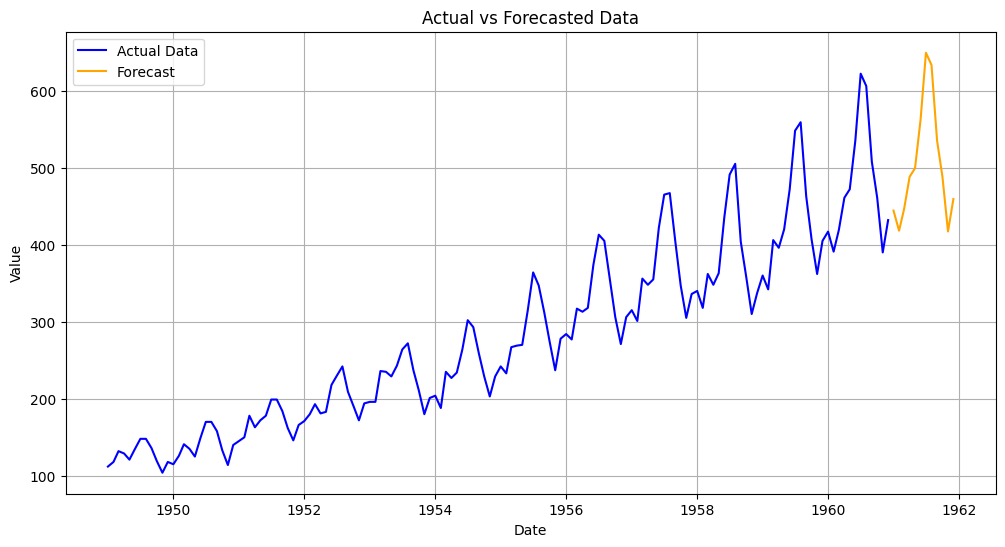

In [4]:
import matplotlib.pyplot as plt

# Assuming df and forecast_df have a 'date' column and a 'value' column
plt.figure(figsize=(12, 6))
plt.plot(df['ds'], df['y'], label='Actual Data', color='blue')
plt.plot(forecast_df['ds'], forecast_df['AutoARIMA'], label='Forecast', color='orange')

# Add confidence intervals if available
if 'lower' in forecast_df.columns and 'upper' in forecast_df.columns:
    plt.fill_between(
        forecast_df['ds'],
        forecast_df['AutoARIMA-lo-90'],
        forecast_df['AutoARIMA-hi-90'],
        color='orange',
        alpha=0.2,
        label='90% Confidence Interval'
    )

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Forecasted Data')
plt.grid()
plt.show()


In [48]:
Y_df = pd.read_parquet('https://datasets-nixtla.s3.amazonaws.com/m4-hourly.parquet')
Y_df.head()

,unique_id,ds,y
0,H1,1,605.0
1,H1,2,586.0
2,H1,3,586.0
3,H1,4,559.0
4,H1,5,511.0


In [49]:
uids = Y_df['unique_id'].unique()[:10] # Select 10 ids to make the example faster
Y_df = Y_df.query('unique_id in @uids')
Y_df = Y_df.groupby('unique_id').tail(7 * 24) #Select last 7 days of data to make example faster

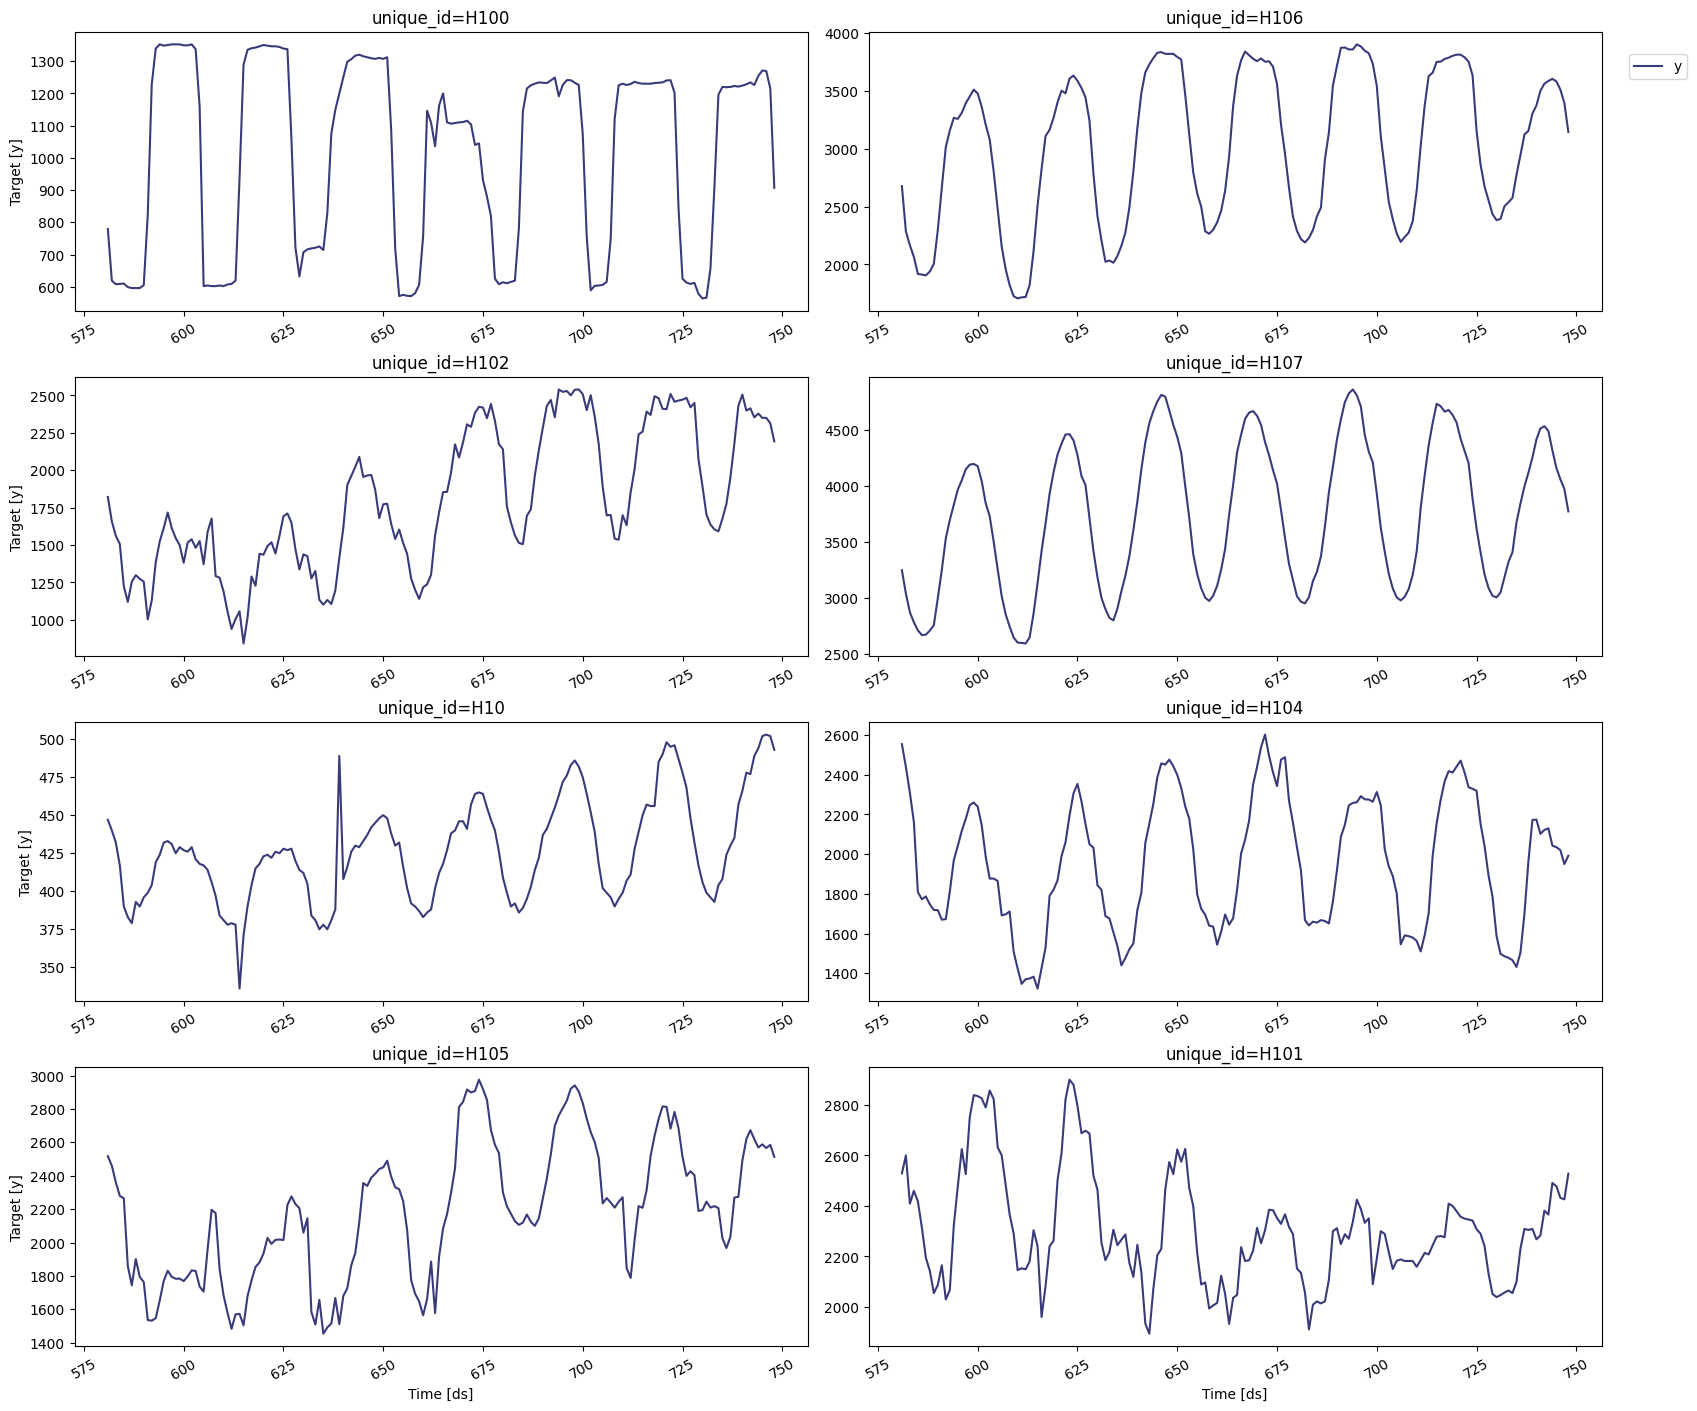

In [50]:
from statsforecast import StatsForecast
StatsForecast.plot(Y_df)

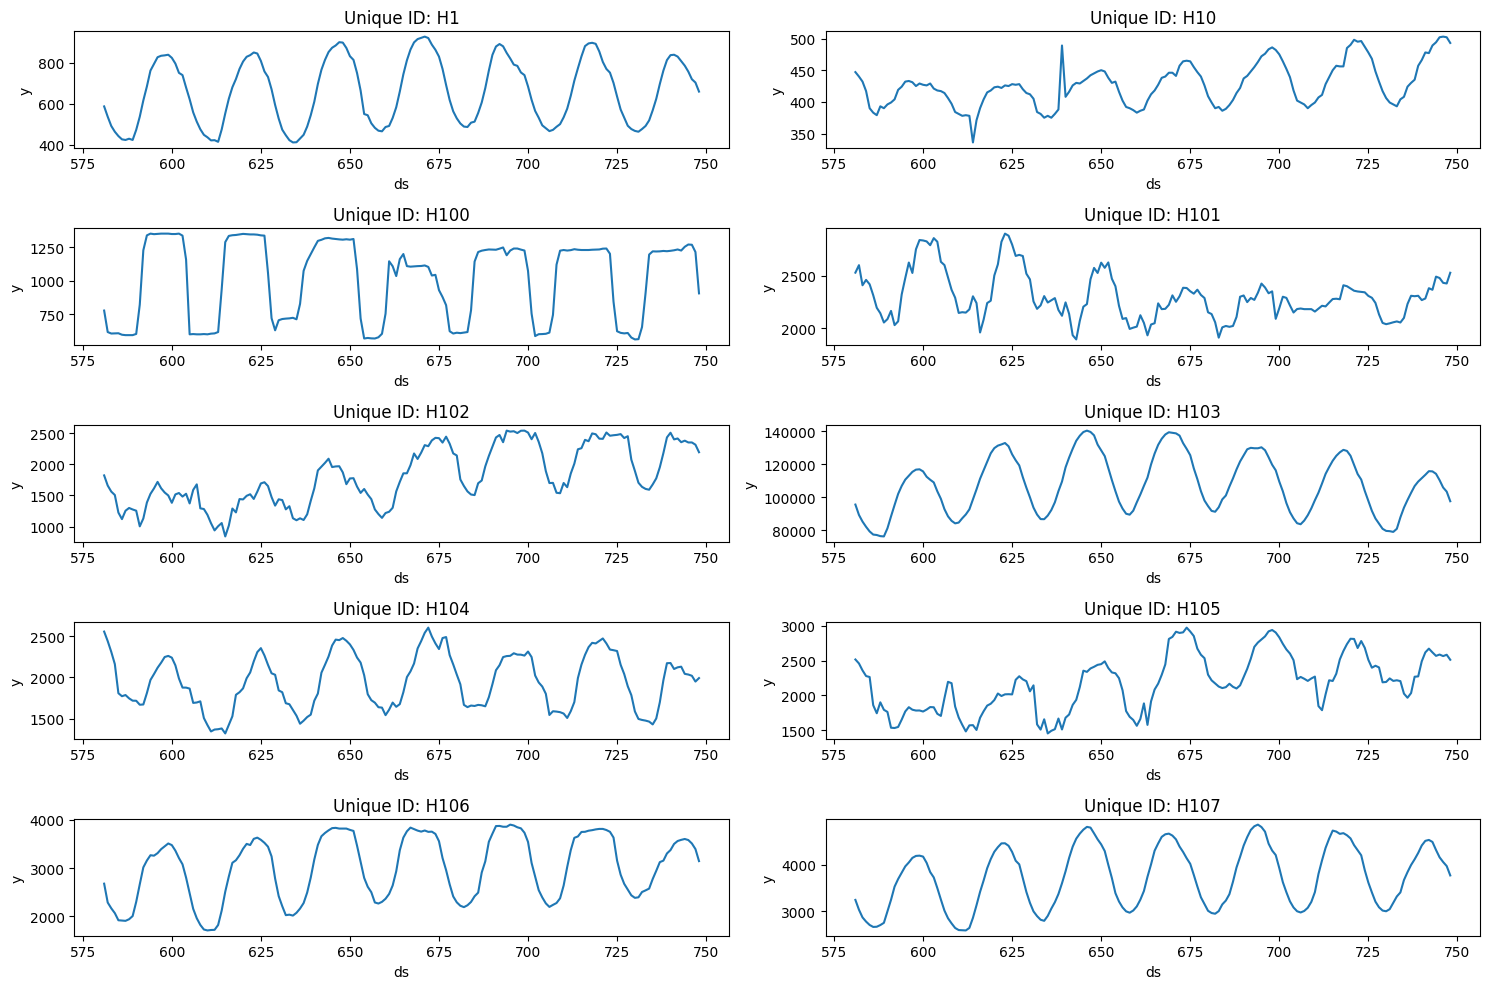

In [7]:
import matplotlib.pyplot as plt

# Ejemplo de datos (reemplaza esto con tu DataFrame real)
# Y_df = pd.read_parquet('your_parquet_file.parquet')

# Crear un subconjunto si tienes demasiados unique_ids (opcional)
unique_ids = Y_df['unique_id'].unique()

# Configuración de subgráficos
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Convertimos en una lista plana para iterar fácilmente

for idx, unique_id in enumerate(unique_ids):  # Solo los primeros 6 ids
    ax = axes[idx]  # Seleccionamos el subplot correspondiente
    df_filtered = Y_df[Y_df['unique_id'] == unique_id]
    ax.plot(df_filtered['ds'], df_filtered['y'], label=f"ID: {unique_id}")
    ax.set_title(f"Unique ID: {unique_id}")
    ax.set_xlabel("ds")
    ax.set_ylabel("y")

# Ajustar diseño
plt.tight_layout()
plt.show()

In [8]:
from statsforecast import StatsForecast
from statsforecast.models import (
    HoltWinters,
    CrostonClassic as Croston, 
    HistoricAverage,
    DynamicOptimizedTheta as DOT,
    SeasonalNaive
)

# Create a list of models and instantiation parameters
models = [
    HoltWinters(),
    Croston(),
    SeasonalNaive(season_length=24),
    HistoricAverage(),
    DOT(season_length=24)
]

# Instantiate StatsForecast class as sf
sf = StatsForecast( 
    models=models,
    freq=1, 
    fallback_model = SeasonalNaive(season_length=7),
    n_jobs=-1,
)

In [9]:
forecasts_df = sf.forecast(df=Y_df, h=48, level=[90])
forecasts_df.head()

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:494: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


,ds,HoltWinters,HoltWinters-lo-90,HoltWinters-hi-90,CrostonClassic,CrostonClassic-lo-90,CrostonClassic-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,HistoricAverage,HistoricAverage-lo-90,HistoricAverage-hi-90,DynamicOptimizedTheta,DynamicOptimizedTheta-lo-90,DynamicOptimizedTheta-hi-90
unique_id,,,,,,,,,,,,,,,,
H1,749,829.0,-246.367557,1904.367557,829.0,-246.367557,1904.367557,635.0,537.471214,732.528786,660.982143,398.037761,923.926524,592.701851,577.677280,611.652639
H1,750,807.0,-268.367557,1882.367557,807.0,-268.367557,1882.367557,572.0,474.471214,669.528786,660.982143,398.037761,923.926524,525.589116,505.449755,546.621805
H1,751,785.0,-290.367557,1860.367557,785.0,-290.367557,1860.367557,532.0,434.471214,629.528786,660.982143,398.037761,923.926524,489.251814,462.072871,512.424116
H1,752,756.0,-319.367557,1831.367557,756.0,-319.367557,1831.367557,493.0,395.471214,590.528786,660.982143,398.037761,923.926524,456.195032,430.554302,478.260963
H1,753,719.0,-356.367557,1794.367557,719.0,-356.367557,1794.367557,477.0,379.471214,574.528786,660.982143,398.037761,923.926524,436.290514,411.051232,461.815932


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


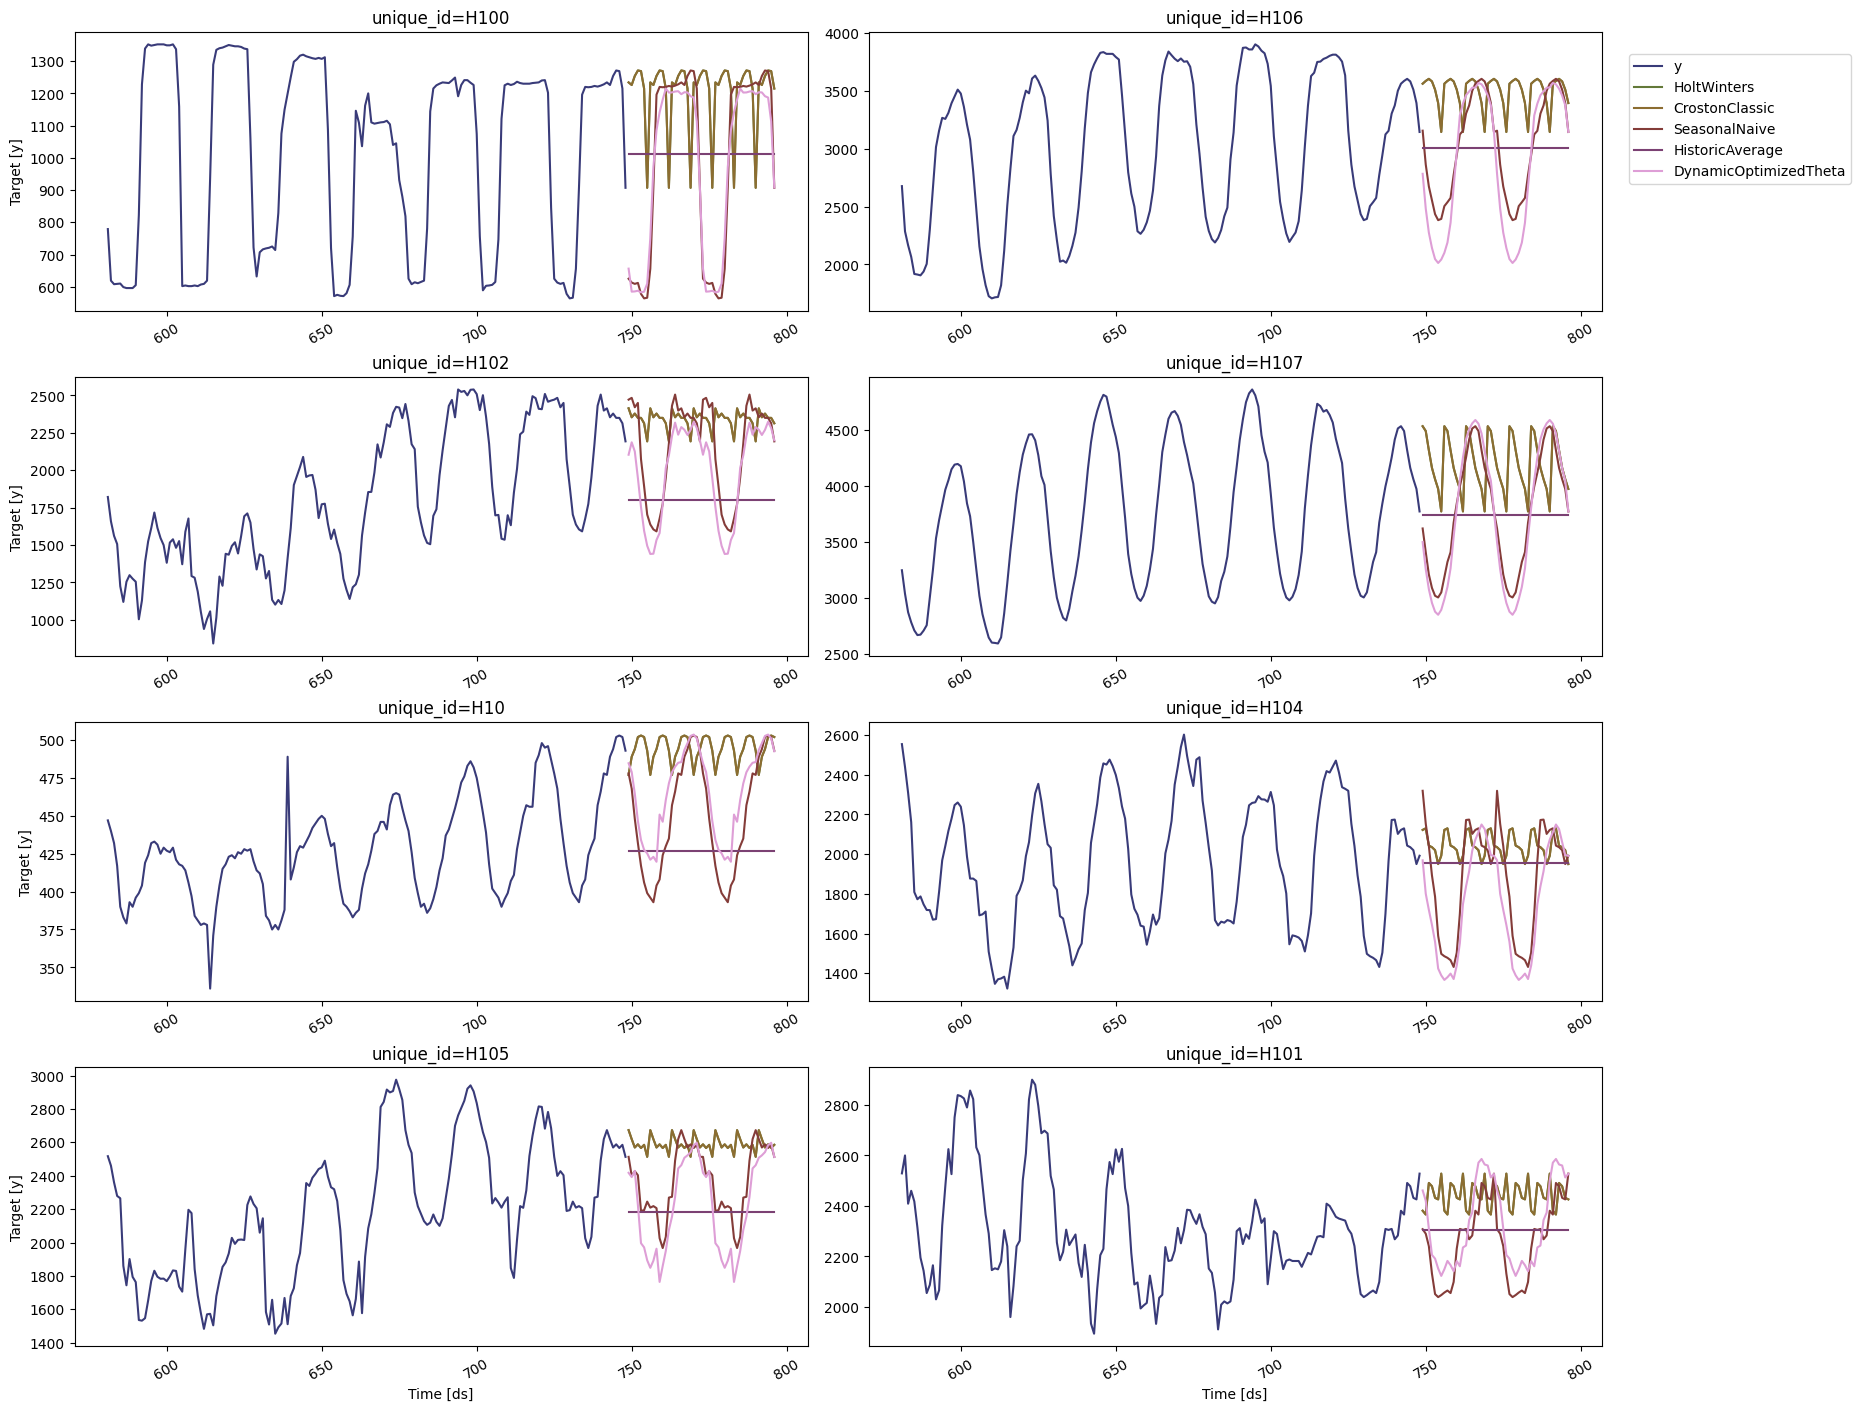

In [10]:
sf.plot(Y_df,forecasts_df)

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


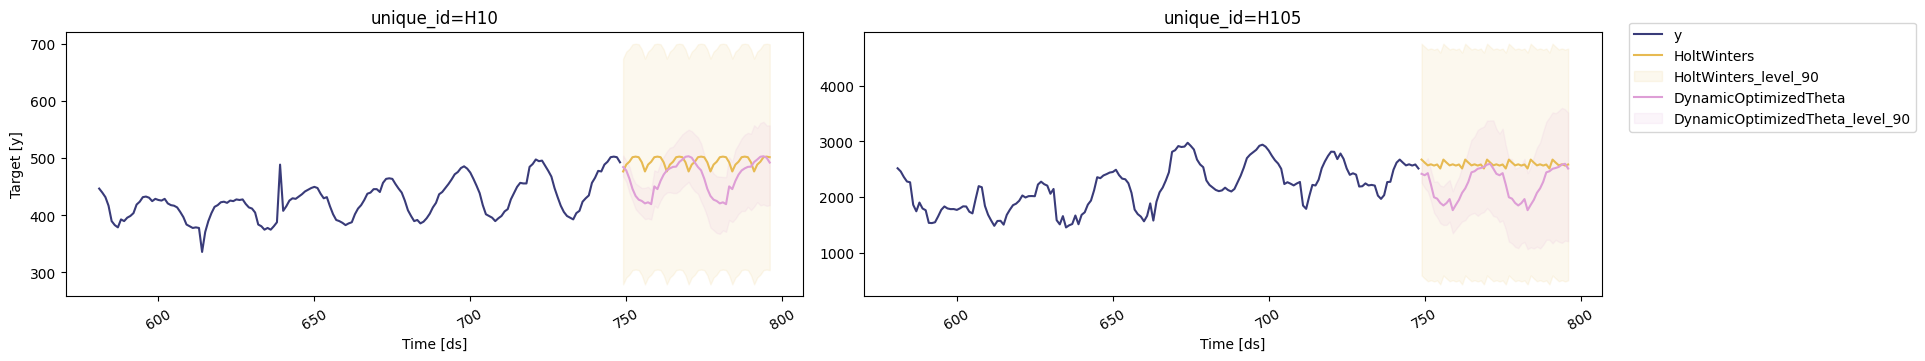

In [11]:
# Plot to unique_ids and some selected models
sf.plot(Y_df, forecasts_df, models=["HoltWinters","DynamicOptimizedTheta"], unique_ids=["H10", "H105"], level=[90])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsforecast\core.py:1407: FutureWarning: Passing the ids as the index is deprecated. Please provide them as a column instead.
  warnings.warn(


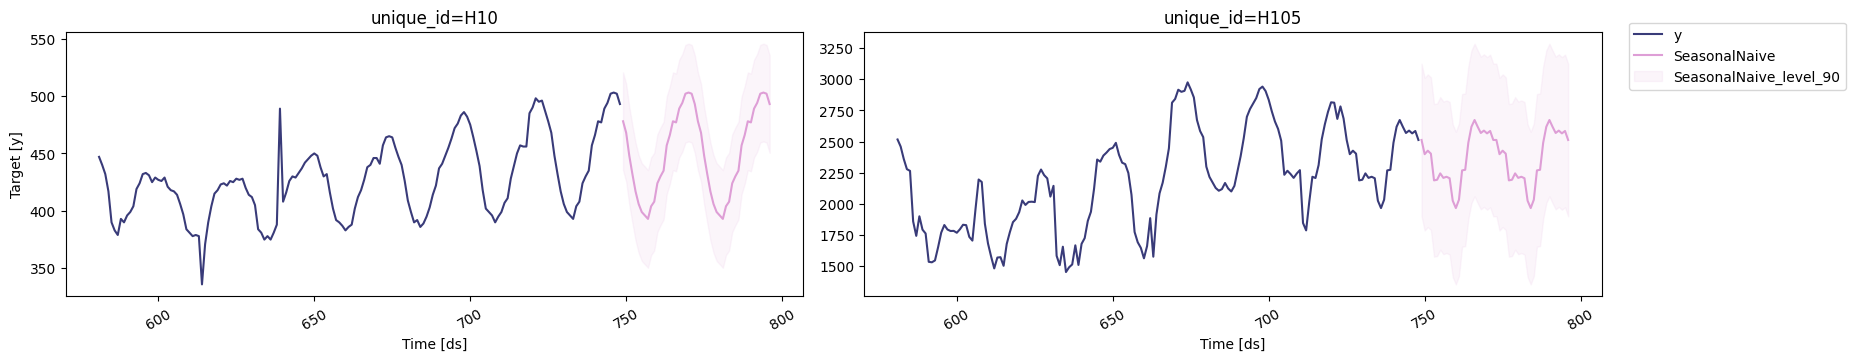

In [12]:
# Explore other models 
sf.plot(Y_df, forecasts_df, models=["SeasonalNaive"], unique_ids=["H10", "H105"], level=[90])

In [ ]:
# https://utdt.zoom.us/rec/play/NP9vpddxjpkENOgHN3IEMxjet0Tzz3Vvg8S_jrzOxsr4gYlars6TXbEYS0H66sidIGecO-9SVT4pGs1o.54QnFD748RhP3Xdu?canPlayFromShare=true&from=share_recording_detail&continueMode=true&componentName=rec-play&originRequestUrl=https%3A%2F%2Futdt.zoom.us%2Frec%2Fshare%2F6bDwTbEXmALx5CM90GMlKCJsmYXb3xauX-fNVs05CWyCrevq0QdvDnuosVKRx4O3.N4zNbnI-kv-GTsc3